# **Homework 1**

Due by **Feburary 10, 2023**


**Question 1**: Please design a linear regression algorithm to obtain the optimal value of $w_0$ and $w_1$ for the given data in Data_HW1_1.csv by assuming the outputs and the data samples provided in the following satisfy $y=w_0+w_1\times x +\varepsilon$, where $\varepsilon$ is measurement noise. 

*   Please provide the code, optimal values of $w_0$, $w_1$, training error, and testing error.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libaries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Obtain your data samples
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HWs/HW1/Data_HW1_1.csv') 
x_data = data['x'].values
y_data = data['y'].values

# Generate training data 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Gradient-descent solution
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000, validation_data=(x_test, y_test))

Epoch 1/2000
7/7 [==============================] - 1s 30ms/step - loss: 6.0701 - mean_absolute_error: 6.0701 - val_loss: 5.8292 - val_mean_absolute_error: 5.8292
Epoch 2/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.0630 - mean_absolute_error: 6.0630 - val_loss: 5.8225 - val_mean_absolute_error: 5.8225
Epoch 3/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.0559 - mean_absolute_error: 6.0559 - val_loss: 5.8159 - val_mean_absolute_error: 5.8159
Epoch 4/2000
7/7 [==============================] - 0s 5ms/step - loss: 6.0487 - mean_absolute_error: 6.0487 - val_loss: 5.8092 - val_mean_absolute_error: 5.8092
Epoch 5/2000
7/7 [==============================] - 0s 9ms/step - loss: 6.0416 - mean_absolute_error: 6.0416 - val_loss: 5.8025 - val_mean_absolute_error: 5.8025
Epoch 6/2000
7/7 [==============================] - 0s 5ms/step - loss: 6.0345 - mean_absolute_error: 6.0345 - val_loss: 5.7958 - val_mean_absolute_error: 5.7958
Epoch 7/2000
7/7 [=========

3/3 - 0s - loss: 0.0362 - mean_absolute_error: 0.0362 - 23ms/epoch - 8ms/step
0.03615250438451767


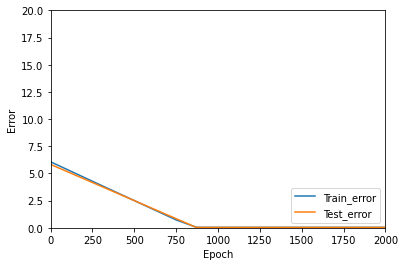

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Print weight and bias
W = model.layers[1].get_weights()
print(W)

[array([[1.9877695]], dtype=float32), array([-6.0009484], dtype=float32)]


**Question 2**: Please design a linear regression algorithm to obtain the optimal value of $w_0$, $w_1$, $w_2$, and $w_3$ for the given data in Data_HW1_2.csv by assuming the outputs and the data samples provided in the following satisfy $y=w_0+w_1\times x +w_2\times x^2+w_3\times x^3+\varepsilon$, where $\varepsilon$ is measurement noise. 

*   Please provide the code, optimal values of $w_0$, $w_1$, $w_2$, $w_3$, training error, and testing error.

In [ ]:
# Obtain your data samples
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HWs/HW1/Data_HW1_2.csv') 
x1 = data['x'].values
x2 = np.power(x1, 2)
x3 = np.power(x1, 3)
x_data = np.stack((x1, x2, x3), axis = 1)
y_data = data['y'].values

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Gradient-descent solution
model = models.Sequential()
model.add(layers.Normalization(input_shape=(3,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 3)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 7
Trainable params: 4
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 11ms/step - loss: 16.9596 - mean_absolute_error: 16.9596 - val_loss: 15.6148 - val_mean_absolute_error: 15.6148
Epoch 1002/3500
7/7 [==============================] - 0s 10ms/step - loss: 16.8501 - mean_absolute_error: 16.8501 - val_loss: 15.5102 - val_mean_absolute_error: 15.5102
Epoch 1003/3500
7/7 [==============================] - 0s 10ms/step - loss: 16.7342 - mean_absolute_error: 16.7342 - val_loss: 15.4089 - val_mean_absolute_error: 15.4089
Epoch 1004/3500
7/7 [==============================] - 0s 12ms/step - loss: 16.6254 - mean_absolute_error: 16.6254 - val_loss: 15.3058 - val_mean_absolute_error: 15.3058
Epoch 1005/3500
7/7 [==============================] - 0s 13ms/step - loss: 16.5135 - mean_absolute_error: 16.5135 - val_loss: 15.2076 - val_mean_absolute_error: 15.2076
Epoch 1006/3500
7/7 [==============================] - 0s 11ms/step - loss: 16.3931 - mean_absolute_error: 16.3931 

3/3 - 0s - loss: 0.0207 - mean_absolute_error: 0.0207 - 24ms/epoch - 8ms/step
0.020749680697917938


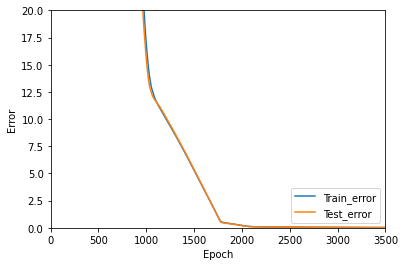

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Print weight and bias
W = model.layers[1].get_weights()
print(W)

[array([[1.8458074],
       [5.0698533],
       [7.9910083]], dtype=float32), array([-2.8930924], dtype=float32)]
